<a href="https://colab.research.google.com/github/Demisha-Govender/700Project/blob/main/Transformer_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#219014298
#Demisha Govender
'''This notebook contains code for the implementation of the Transformer model.
With the chosen 10% of missing values in the dataset and the chosen MICE method to handle the missing values. Theses desired values and techniques
were chosen after running multiple experiments in the experiment notebook to determine the optimal percentage of missing values and the imputation technique to use.'''
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
import pandas as pd 
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import statsmodels.api as sm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pylab
import matplotlib.patches as mpatches
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.layers import Dense
from keras.layers import LSTM
from numpy import sqrt 

In [ ]:
df1 = pd.read_csv("/home/household_power_consumption.txt",delimiter=";")
df1["datetime"] = df1[["Date","Time"]].apply(lambda x: x[0]+" "+x[1],axis=1)
df1["datetime"] = pd.to_datetime(df1["datetime"], infer_datetime_format=True)
df1 = df1.drop(["Date","Time"],axis=1)
df1.index = df1["datetime"]
df1 = df1.drop("datetime",axis=1)
df1 = df1.apply(lambda x: pd.to_numeric(x, errors='coerce'))
dff = df1.copy(deep=True)
print(df1)

                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
...                                  ...                    ...      ...   
2007-01-19 08:23:00                3.602                  0.100   237.33   
2007-01-19 08:24:00                3.592                  0.098   237.09   
2007-01-19 08:25:00                3.572                  0.096   236.32   
2007-01-19 08:26:00                3.562                  0.096   236.08   
2007-01-19 08:27:00                3.552                  0.094   235.72   

           

In [ ]:
#Different Percentage of missing values
gapminder_NaN10 = df1.mask(np.random.random(df1.shape)<0.014)
gapminder_NaN20 = df1.mask(np.random.random(df1.shape)<0.02857)
gapminder_NaN30 = df1.mask(np.random.random(df1.shape)<0.04286)
gapminder_NaN40 = df1.mask(np.random.random(df1.shape)<0.05714)
gapminder_NaN50 = df1.mask(np.random.random(df1.shape)<0.0714)

#Write the different percentages to a new file
gapminder_NaN10.to_csv('10.csv')
gapminder_NaN20.to_csv('20.csv')
gapminder_NaN30.to_csv('30.csv')
gapminder_NaN40.to_csv('40.csv')
gapminder_NaN50.to_csv('50.csv')

#Read the different Percentage files
df= pd.read_csv('/content/10.csv', header=0, index_col=0)
#df= pd.read_csv('/content/20.csv', header=0, index_col=0)
#df= pd.read_csv('/content/30.csv', header=0, index_col=0)
#df= pd.read_csv('/content/40.csv', header=0, index_col=0)
#df= pd.read_csv('/content/50.csv', header=0, index_col=0)
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2007-01-19 08:23:00,3.602,0.100,237.33,15.0,38.0,0.0,17.0
2007-01-19 08:24:00,3.592,0.098,237.09,15.0,38.0,0.0,17.0
2007-01-19 08:25:00,3.572,0.096,236.32,15.0,37.0,0.0,17.0


In [ ]:
df.shape

(48424, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48424 entries, 2006-12-16 17:24:00 to 2007-01-19 08:27:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    47741 non-null  float64
 1   Global_reactive_power  47737 non-null  float64
 2   Voltage                47743 non-null  float64
 3   Global_intensity       47812 non-null  float64
 4   Sub_metering_1         47732 non-null  float64
 5   Sub_metering_2         47691 non-null  float64
 6   Sub_metering_3         47717 non-null  float64
dtypes: float64(7)
memory usage: 3.0+ MB


In [ ]:
df.isna().sum()

Global_active_power      683
Global_reactive_power    687
Voltage                  681
Global_intensity         612
Sub_metering_1           692
Sub_metering_2           733
Sub_metering_3           707
dtype: int64

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
df.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2007-01-19 08:23:00,3.602,0.100,237.33,15.0,38.0,0.0,17.0
2007-01-19 08:24:00,3.592,0.098,237.09,15.0,38.0,0.0,17.0
2007-01-19 08:25:00,3.572,0.096,236.32,15.0,37.0,0.0,17.0
2007-01-19 08:26:00,3.562,0.096,236.08,15.0,38.0,0.0,17.0
2007-01-19 08:27:00,3.552,0.094,235.72,15.0,37.0,0.0,18.0


In [ ]:
#missing values handle-Percentage in each column
def missingValuesPercentageTable(df):
        missVal = df.isna().sum()
        missValPercent =  df.isna().sum() / len(df) *100 
        missValTable = pd.concat([missVal, missValPercent], axis=1)
        missValTableColumns = missValTable.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        missValTableColumns = missValTableColumns[
            missValTableColumns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(4)
        print ("The selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(missValTableColumns.shape[0]) +
              " columns that have missing values.")
        
        return missValTableColumns

In [ ]:
missingPercentage= missingValuesPercentageTable(df)
missingPercentage

The selected dataframe has 7 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Sub_metering_2,733,1.5137
Sub_metering_3,707,1.4600
Sub_metering_1,692,1.4290
Global_reactive_power,687,1.4187
Global_active_power,683,1.4105
Voltage,681,1.4063
Global_intensity,612,1.2638


Different ways to handle the missing data

In [ ]:
#baeline for imputation
#Drop missing values
import statsmodels.api as sm
baselineImputation= df.dropna(how='any')
#Exclude the target variable
X=sm.add_constant(baselineImputation.iloc[:,1:])
y=baselineImputation['Global_active_power']
lm=sm.OLS(y,X).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Method 1
#Handling the missing data using MICE
HandleMVM = df.copy(deep=True)
HandleMVMM = dff.copy(deep=True)
mice_imputer = IterativeImputer()
HandleMVM['Global_active_power'] = mice_imputer.fit_transform(HandleMVM[['Global_active_power']])
HandleMVM['Global_reactive_power'] = mice_imputer.fit_transform(HandleMVM[['Global_reactive_power']])
HandleMVM['Voltage'] = mice_imputer.fit_transform(HandleMVM[['Voltage']])
HandleMVM['Global_intensity'] = mice_imputer.fit_transform(HandleMVM[['Global_intensity']])
HandleMVM['Sub_metering_1'] = mice_imputer.fit_transform(HandleMVM[['Sub_metering_1']])
HandleMVM['Sub_metering_2'] = mice_imputer.fit_transform(HandleMVM[['Sub_metering_2']])
HandleMVM['Sub_metering_3'] = mice_imputer.fit_transform(HandleMVM[['Sub_metering_3']])
HandleMVMM['Global_active_power'] = mice_imputer.fit_transform(HandleMVMM[['Global_active_power']])
HandleMVMM['Global_reactive_power'] = mice_imputer.fit_transform(HandleMVMM[['Global_reactive_power']])
HandleMVMM['Voltage'] = mice_imputer.fit_transform(HandleMVMM[['Voltage']])
HandleMVMM['Global_intensity'] = mice_imputer.fit_transform(HandleMVM[['Global_intensity']])
HandleMVMM['Sub_metering_1'] = mice_imputer.fit_transform(HandleMVMM[['Sub_metering_1']])
HandleMVM['Sub_metering_2'] = mice_imputer.fit_transform(HandleMVMM[['Sub_metering_2']])
HandleMVMM['Sub_metering_3'] = mice_imputer.fit_transform(HandleMVMM[['Sub_metering_3']])
X= sm.add_constant(HandleMVM.iloc[:,1:])
y=HandleMVM['Global_active_power']
lm_mice=sm.OLS(y,X).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Method 3
#Handling the missing data using using Mean Imputation
HandleMV= df.copy(deep=True)
HandleMV.fillna(HandleMV.mean(),inplace=True)
X= sm.add_constant(HandleMV.iloc[:,1:])
y=HandleMV['Global_active_power']
lm_mean=sm.OLS(y,X).fit()

In [ ]:
#Method 4
#Handling the missing data using K-Nearest Neighbor Imputation
from sklearn.impute import KNNImputer
HandleMVK = df.copy(deep=True)
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
HandleMVK['Global_active_power'] = knn_imputer.fit_transform(HandleMVK[['Global_active_power']])
HandleMVK['Global_reactive_power'] = knn_imputer.fit_transform(HandleMVK[['Global_reactive_power']])
HandleMVK['Voltage'] = knn_imputer.fit_transform(HandleMVK[['Voltage']])
HandleMVK['Global_intensity'] = knn_imputer.fit_transform(HandleMVK[['Global_intensity']])
HandleMVK['Sub_metering_1'] = knn_imputer.fit_transform(HandleMVK[['Sub_metering_1']])
HandleMVK['Sub_metering_2'] = knn_imputer.fit_transform(HandleMVK[['Sub_metering_2']])
HandleMVK['Sub_metering_3'] =knn_imputer.fit_transform(HandleMVK[['Sub_metering_3']])
X= sm.add_constant(HandleMVK.iloc[:,1:])
y=HandleMVK['Global_active_power']
lm_knn=sm.OLS(y,X).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Evaluating the impuatation performance
print(pd.DataFrame({'baseline':lm.rsquared_adj,
                    'MICE':lm_mice.rsquared_adj,
                    'Mean':lm_mean.rsquared_adj,
                    'KNN':lm_knn.rsquared_adj},
                   index=['R_squared_adj']))

               baseline      MICE      Mean       KNN
R_squared_adj  0.998116  0.972663  0.972663  0.972663


In [ ]:
#Check to see if the missing values have been handled
HandleMVM.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
HandleMVM.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
HandleMVM.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2007-01-19 08:23:00,3.602,0.100,237.33,15.0,38.0,0.0,17.0
2007-01-19 08:24:00,3.592,0.098,237.09,15.0,38.0,0.0,17.0
2007-01-19 08:25:00,3.572,0.096,236.32,15.0,37.0,0.0,17.0
2007-01-19 08:26:00,3.562,0.096,236.08,15.0,38.0,0.0,17.0
2007-01-19 08:27:00,3.552,0.094,235.72,15.0,37.0,0.0,18.0


In [ ]:
#Create a new column called sub_metering_4
# add a column for for the remainder of sub metering
HandleMVM['Sub_metering_4'] = (HandleMVM['Global_active_power']*1000 /60 ) -  (HandleMVM['Sub_metering_1'] + HandleMVM['Sub_metering_2'] + HandleMVM['Sub_metering_3'])
HandleMVMM['Sub_metering_4'] = (HandleMVMM['Global_active_power']*1000 /60 ) -  (HandleMVMM['Sub_metering_1'] + HandleMVMM['Sub_metering_2'] + HandleMVMM['Sub_metering_3'])

Stationarity Test

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
Augmented_Dickey_Fuller_Test_func(HandleMVM['Global_active_power'],"Global_active_power")
print()
Augmented_Dickey_Fuller_Test_func(HandleMVM['Global_reactive_power'],"Global_reactive_power",)
print()
Augmented_Dickey_Fuller_Test_func(HandleMVM['Voltage'],"Voltage")
print()
Augmented_Dickey_Fuller_Test_func(HandleMVM['Global_intensity'],"Global_intensity")
print()
Augmented_Dickey_Fuller_Test_func(HandleMVM['Sub_metering_1'],"Sub_metering_1" )
print()
Augmented_Dickey_Fuller_Test_func(HandleMVM['Sub_metering_2'],"Sub_metering_2",)
print()
Augmented_Dickey_Fuller_Test_func(HandleMVM['Sub_metering_3'],"Sub_metering_3")
print()
Augmented_Dickey_Fuller_Test_func(HandleMVM['Sub_metering_4'],"Sub_metering_4")

Results of Dickey-Fuller Test for column: Global_active_power
Test Statistic                -1.155704e+01
p-value                        3.339612e-21
No Lags Used                   5.600000e+01
Number of Observations Used    4.836700e+04
Critical Value (1%)           -3.430485e+00
Critical Value (5%)           -2.861600e+00
Critical Value (10%)          -2.566802e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary

Results of Dickey-Fuller Test for column: Global_reactive_power
Test Statistic                   -21.513942
p-value                            0.000000
No Lags Used                      57.000000
Number of Observations Used    48366.000000
Critical Value (1%)               -3.430485
Critical Value (5%)               -2.861600
Critical Value (10%)              -2.566802
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary

Results of Dickey-Fuller Test for column: Voltage
Test Statistic                -1.135907e+01
p-valu

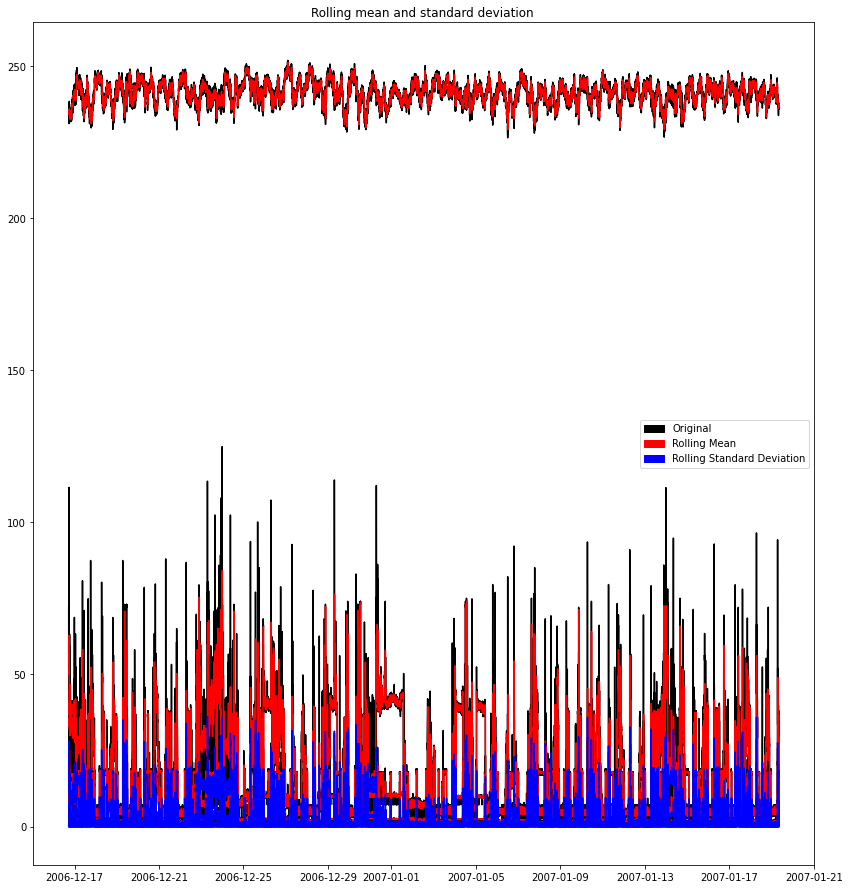

In [ ]:
#Rolling mean and standard deviation for all variables in the dataset.
plt.rcParams["figure.figsize"] = (14,15.5)
index=HandleMVMM
rmean=index.rolling(window=12).mean()
rstd=index.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(index , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
black_patch = mpatches.Patch(color='black', label='Original')
red_patch = mpatches.Patch(color='red', label='Rolling Mean')
blue_patch = mpatches.Patch(color='blue', label='Rolling Standard Deviation')
pylab.legend(handles=[black_patch,red_patch,blue_patch])
plt.title("Rolling mean and standard deviation ")
plt.show(block=False)

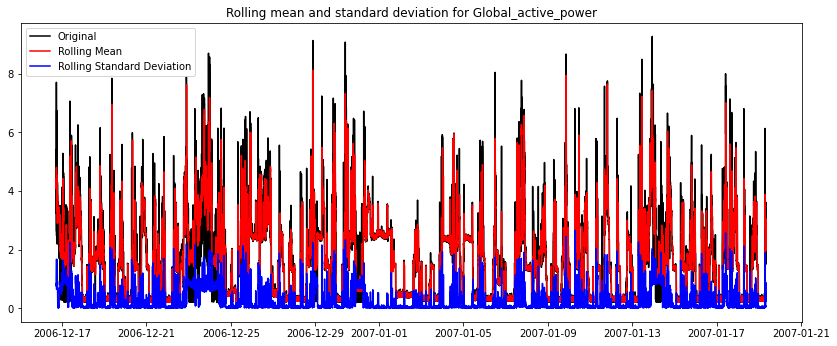

In [ ]:
plt.rcParams["figure.figsize"] = (14,5.5)
index=HandleMVMM['Global_active_power']
rmean=index.rolling(window=12).mean()
rstd=index.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(index , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation for Global_active_power")
plt.show(block=False)

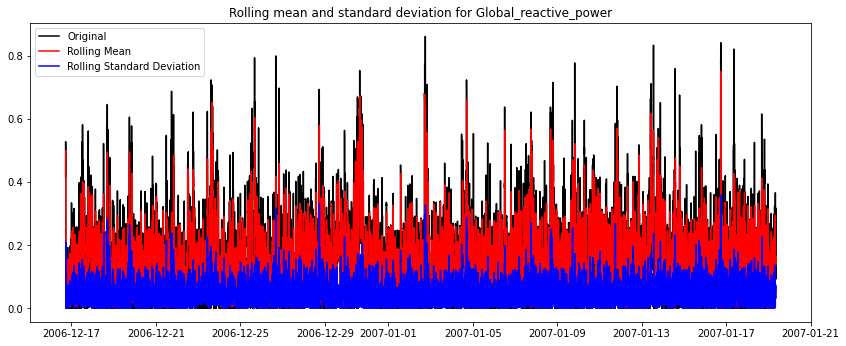

In [ ]:
plt.rcParams["figure.figsize"] = (14,5.5)
index=HandleMVMM['Global_reactive_power']
rmean=index.rolling(window=12).mean()
rstd=index.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(index , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation for Global_reactive_power")
plt.show(block=False)

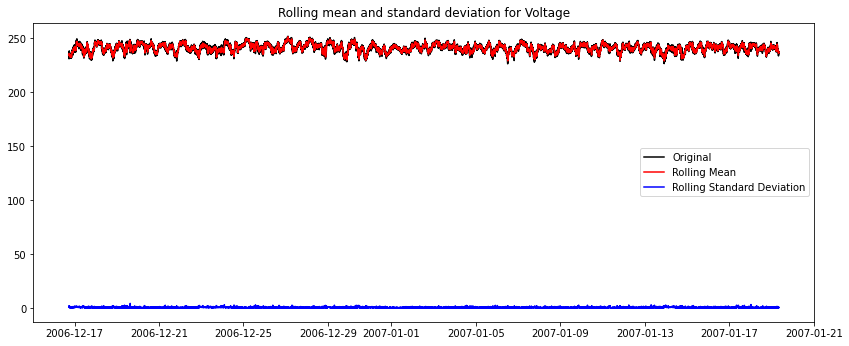

In [ ]:
plt.rcParams["figure.figsize"] = (14,5.5)
index=HandleMVMM['Voltage']
rmean=index.rolling(window=12).mean()
rstd=index.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(index , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation for Voltage")
plt.show(block=False)

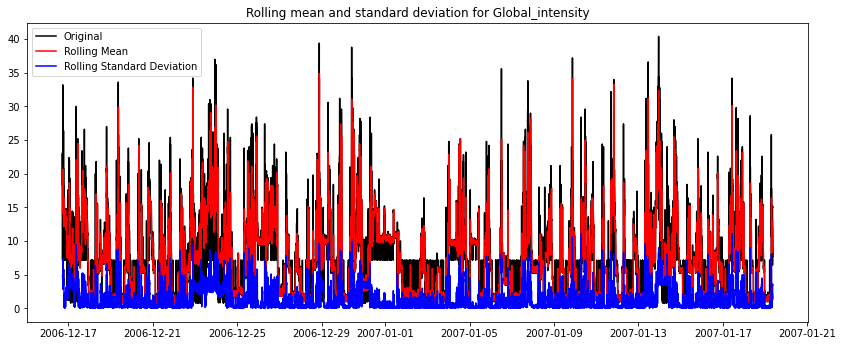

In [ ]:
plt.rcParams["figure.figsize"] = (14,5.5)
index=HandleMVMM['Global_intensity']
rmean=index.rolling(window=12).mean()
rstd=index.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(index , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation for Global_intensity")
plt.show(block=False)

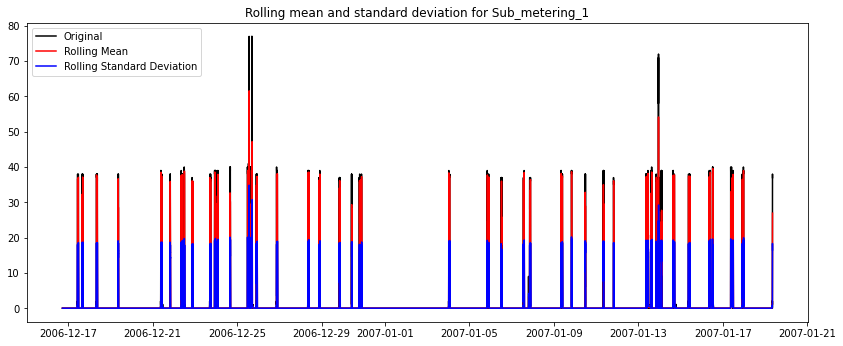

In [ ]:
plt.rcParams["figure.figsize"] = (14,5.5)
index=HandleMVMM['Sub_metering_1']
rmean=index.rolling(window=12).mean()
rstd=index.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(index , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation for Sub_metering_1")
plt.show(block=False)

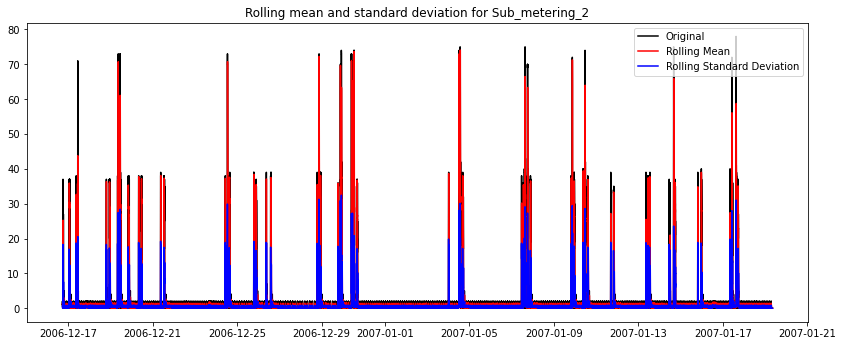

In [ ]:
plt.rcParams["figure.figsize"] = (14,5.5)
index=HandleMVMM['Sub_metering_2']
rmean=index.rolling(window=12).mean()
rstd=index.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(index , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation for Sub_metering_2")
plt.show(block=False)

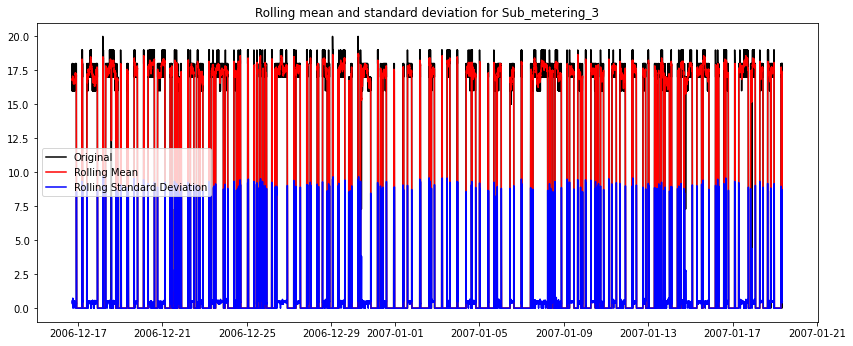

In [ ]:
plt.rcParams["figure.figsize"] = (14,5.5)
index=HandleMVMM['Sub_metering_3']
rmean=index.rolling(window=12).mean()
rstd=index.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(index , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation for Sub_metering_3")
plt.show(block=False)

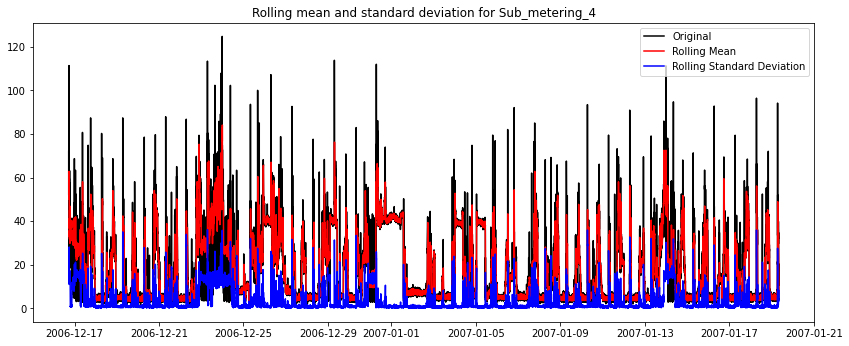

In [ ]:
plt.rcParams["figure.figsize"] = (14,5.5)
index=HandleMVMM['Sub_metering_4']
rmean=index.rolling(window=12).mean()
rstd=index.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(index , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation for Sub_metering_4")
plt.show(block=False)

In [ ]:
HandleMVM.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


Visualization of time series data

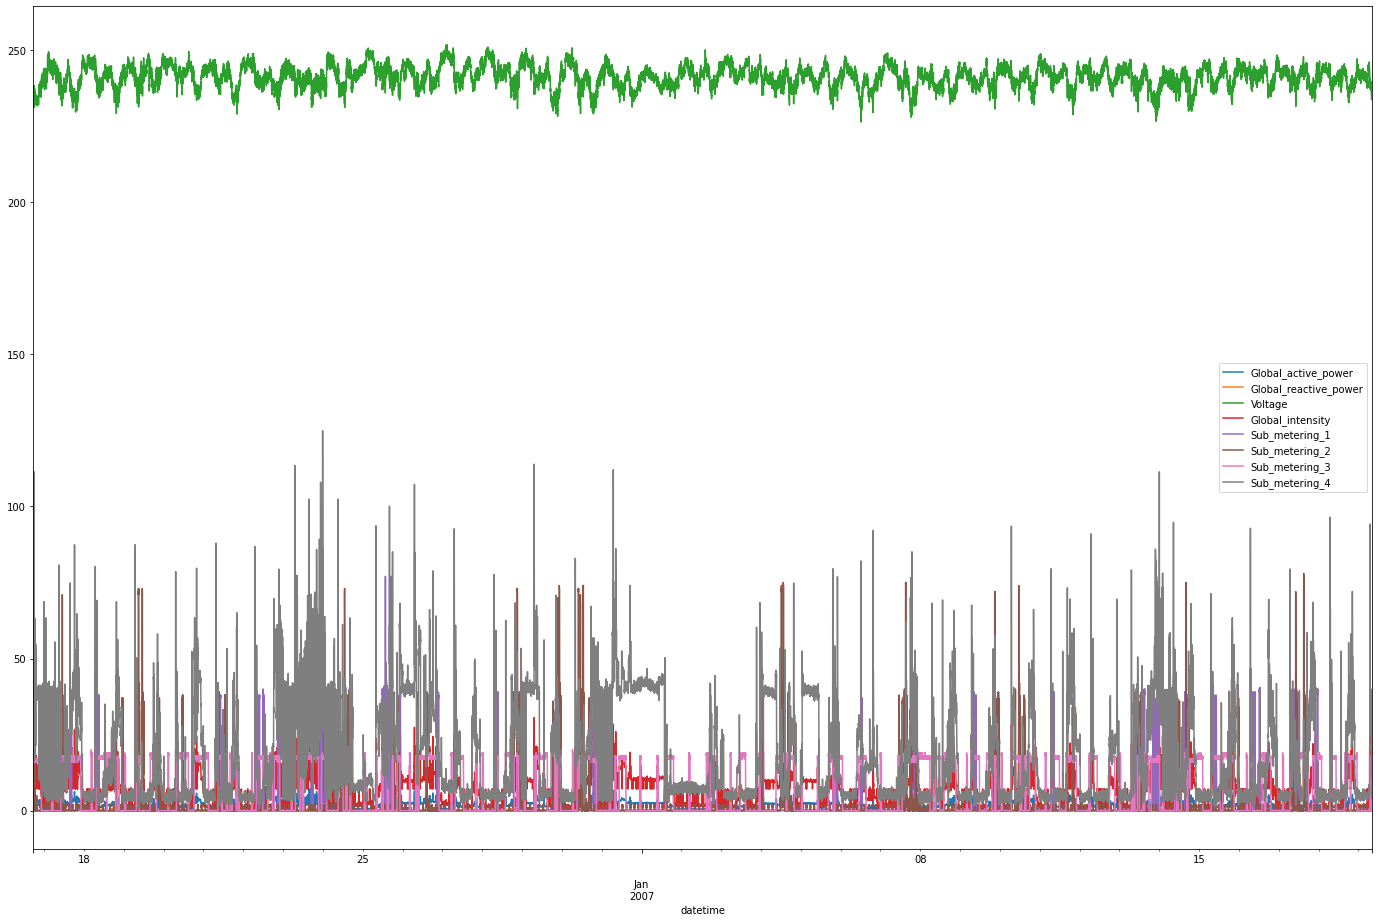

In [ ]:
plt.rcParams["figure.figsize"] = (24,15.5)
HandleMVMM.plot()

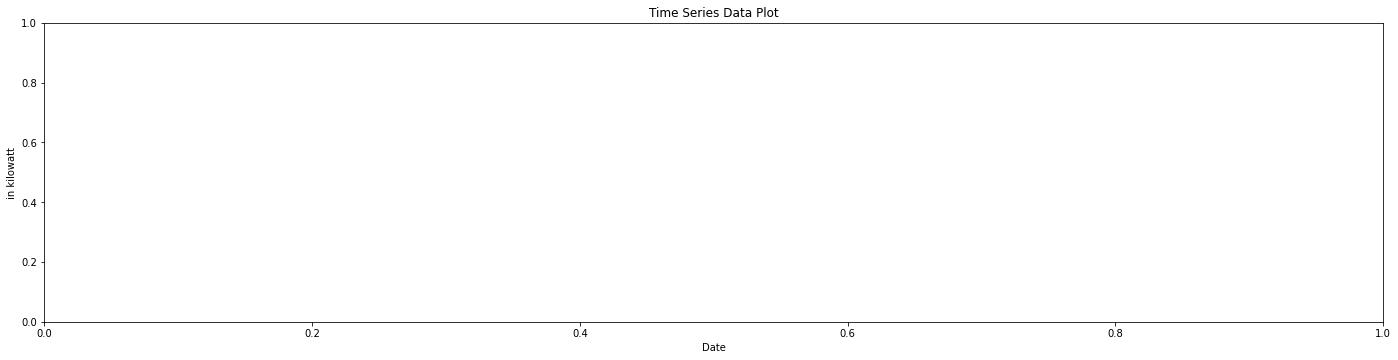

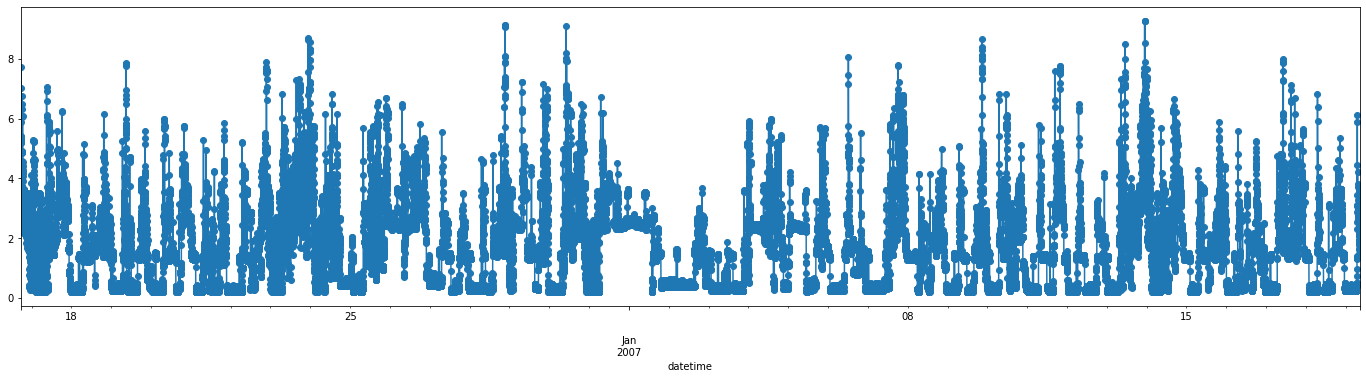

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (24,5.5)
t=HandleMVMM["Global_active_power"]
#plt.plot(t, marker='o')
plt.xlabel("Date")
plt.ylabel("in kilowatt")
plt.title("Time Series Data Plot")
plt.show()
t.plot(marker='o')

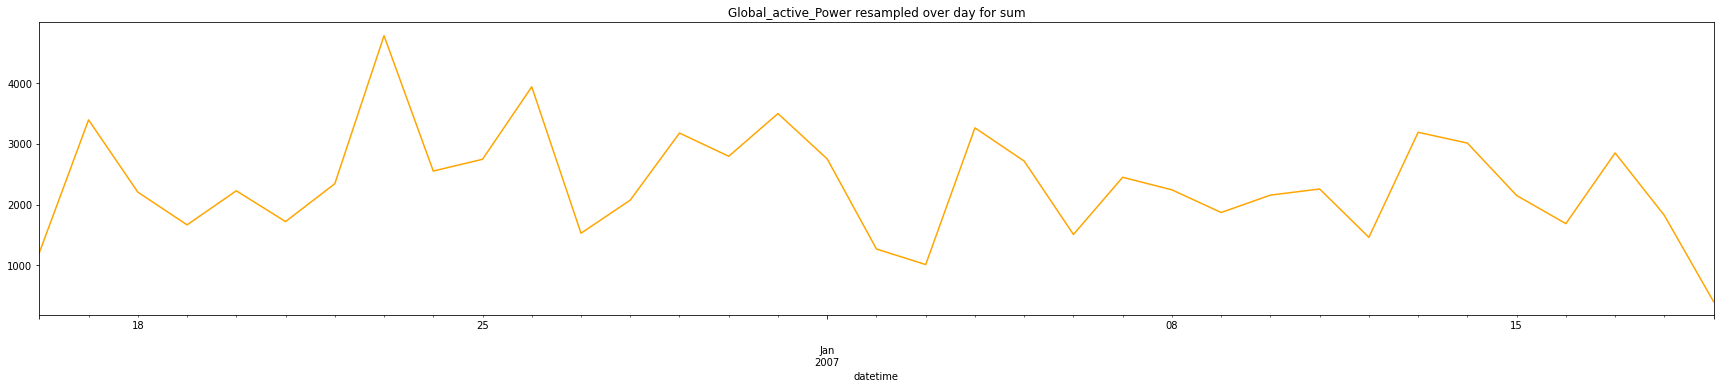

[]

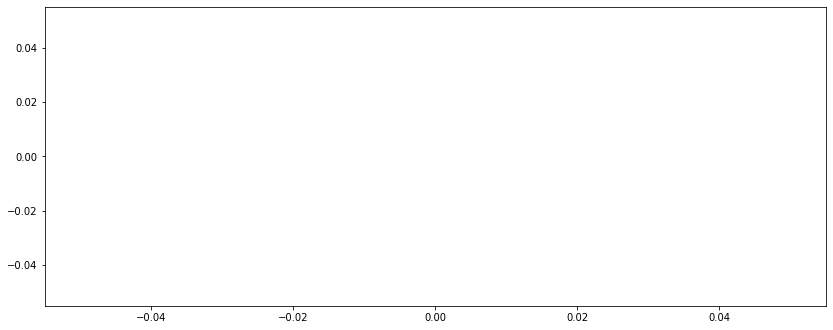

In [ ]:
HandleMVMM.Global_active_power.resample("D").sum().plot(title="Global_active_Power resampled over day for sum",color='orange')
plt.rcParams["figure.figsize"] = (14,5.5)
plt.tight_layout()
plt.show()
plt.plot()

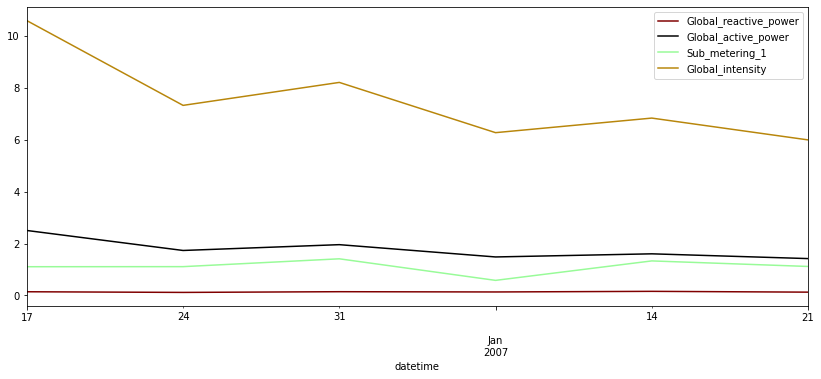

In [ ]:
# resampling over week and computing mean 
plt.rcParams["figure.figsize"] = (14,5.5)
HandleMVMM.Global_reactive_power.resample('W').mean().plot(color='Maroon',legend=True)
HandleMVMM.Global_active_power.resample('W').mean().plot(color='black', legend=True)
HandleMVMM.Sub_metering_1.resample('W').mean().plot(color='PaleGreen',legend=True)
HandleMVMM.Global_intensity.resample("W").mean().plot(color='DarkGoldenrod',legend=True)
plt.show()

Number of measurements: 48424


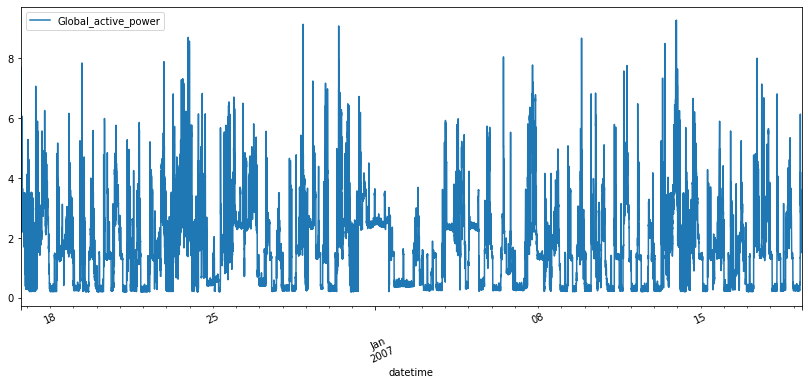

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,5.5)
print("Number of measurements: "+str(len(HandleMVM['Global_active_power'])))
HandleMVMM.plot(y='Global_active_power', rot=25);

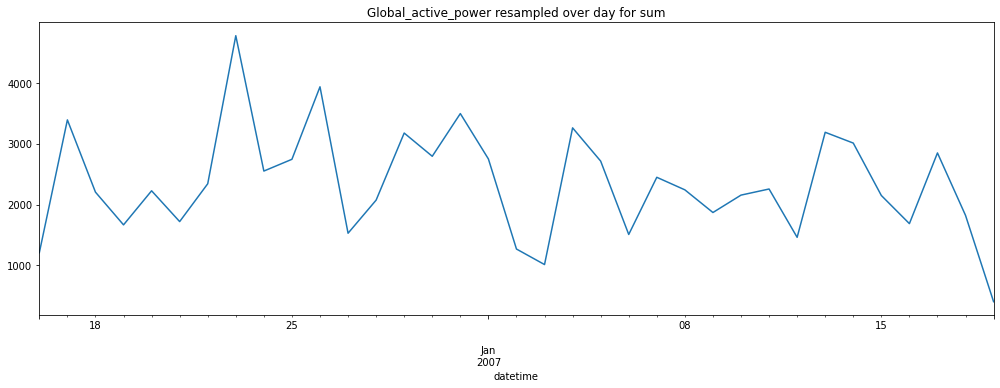

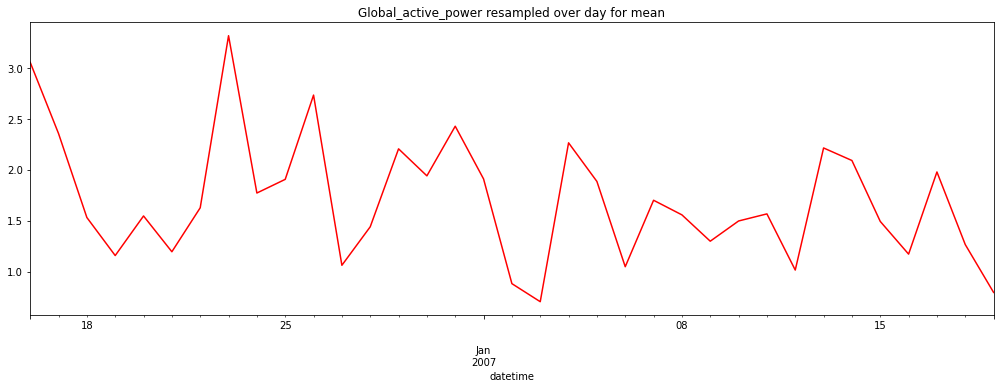

In [ ]:
plt.rcParams["figure.figsize"] = (14,5.5)
HandleMVMM.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum') 
plt.tight_layout()
plt.show()   

HandleMVMM.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

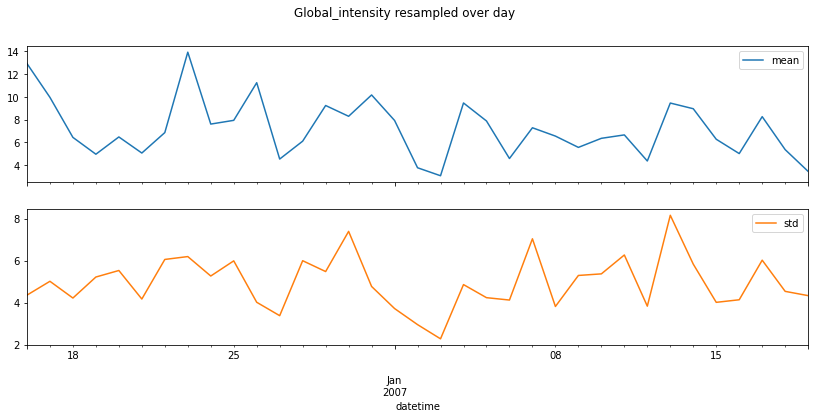

In [ ]:
### Below I show mean and std of 'Global_intensity' resampled over day 
plt.rcParams["figure.figsize"] = (14,5.5)
r = HandleMVMM.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

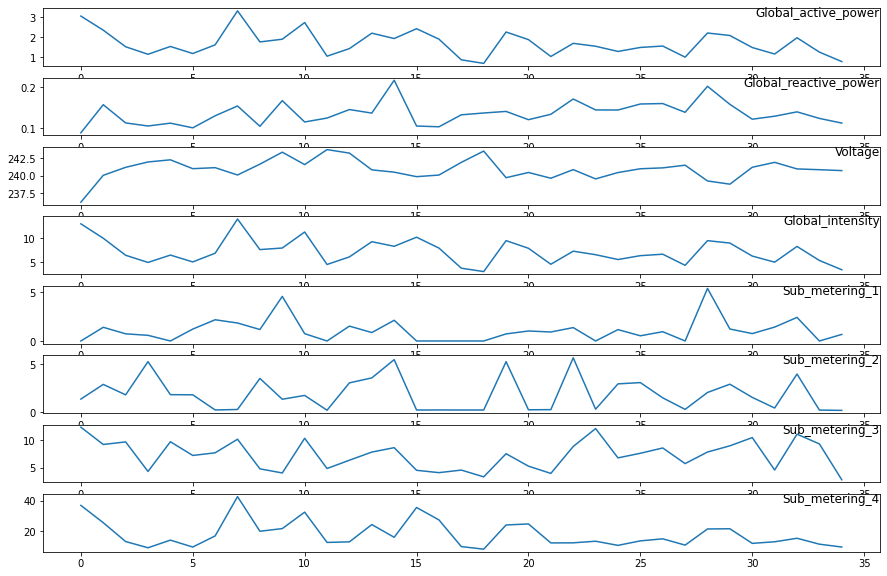

In [ ]:
# Below I compare the mean of different featuresresampled over day. 
plt.rcParams["figure.figsize"] = (14,5.5)
cols = [0, 1, 2, 3, 4, 5, 6,7]
i = 1
groups=cols
values = HandleMVMM.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(HandleMVMM.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

Seasonality

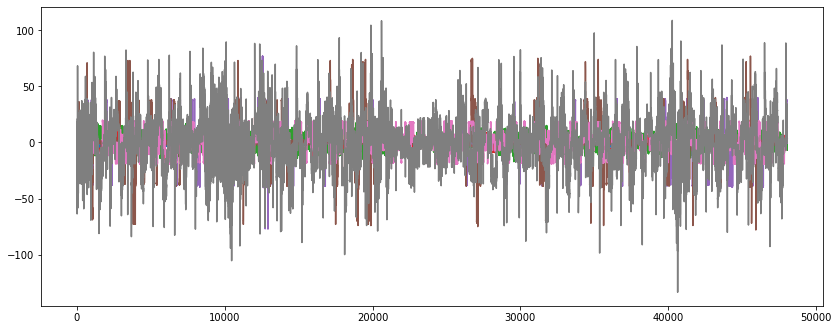

In [ ]:
X = HandleMVM.values
diff = list()
cols=list()
days_in_year = 365
for i in range(days_in_year, len(X)):
	value = X[i] - X[i - days_in_year]
	diff.append(value)
pyplot.plot(diff)

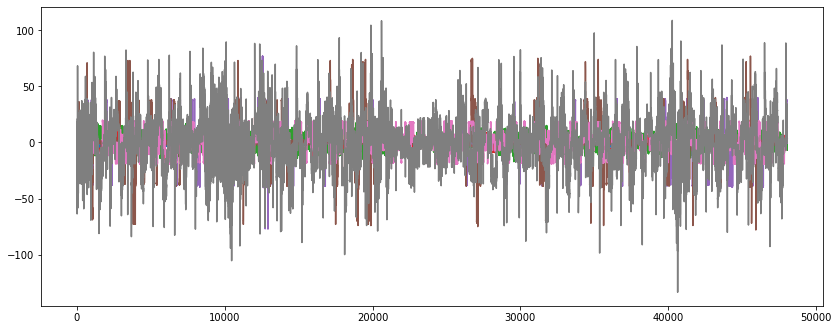

In [ ]:
Handle = HandleMVM.copy(deep=True)
Handle=diff
pyplot.plot(Handle)

In [ ]:
#Convert list back to dataframe
df2 = pd.DataFrame(Handle) 
print(df2) 

           0      1     2     3     4    5     6          7
0     -1.782 -0.346  5.29  -8.4   0.0 -1.0 -17.0 -11.700000
1     -2.858 -0.300  6.61 -12.6   0.0 -1.0 -16.0 -30.633333
2     -2.856 -0.322  7.24 -12.6   0.0 -2.0 -17.0 -28.600000
3     -3.872 -0.312  7.62 -15.4   0.0 -1.0 -17.0 -46.533333
4     -2.168 -0.340  5.34  -8.2   0.0 -1.0 -17.0 -18.133333
...      ...    ...   ...   ...   ...  ...   ...        ...
48054  3.360  0.100 -5.66  14.0  38.0  0.0  17.0   1.000000
48055  3.352  0.098 -5.42  14.0  38.0  0.0  17.0   0.866667
48056  3.332  0.096 -6.23  14.0  37.0  0.0  17.0   1.533333
48057  3.322  0.096 -6.51  14.0  38.0  0.0  17.0   0.366667
48058  3.312  0.094 -6.66  14.0  37.0  0.0  18.0   0.200000

[48059 rows x 8 columns]


In [ ]:
# save to file
#HandleMV.to_csv('updated.csv')
df2.to_csv('updated.csv')

In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load updated dataset
dataset = read_csv('/content/updated.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[1,2,3,4,5,6,7]], axis=1, inplace=True)
print(reframed.head())
 
data = reframed.values

   var1(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)   var6(t)  \
1   0.407291  0.346760  0.298309  0.656599  0.349869  0.519084  0.496774   
2   0.346760  0.346872  0.285024  0.672589  0.349869  0.519084  0.490323   
3   0.346872  0.289716  0.291063  0.682233  0.313316  0.519084  0.496774   
4   0.289716  0.385576  0.274155  0.624365  0.407311  0.519084  0.496774   
5   0.385576  0.450608  0.269324  0.616751  0.454308  0.519084  0.490323   

    var7(t)   var8(t)  
1  0.076923  0.424538  
2  0.051282  0.432930  
3  0.051282  0.358913  
4  0.051282  0.476130  
5  0.051282  0.559778  


In [ ]:
def split_dataset_into_seq(dataset, start_index=0, end_index=None, history_size=200, step=1):
    '''split the dataset to have sequence of observations of length history size'''
    data = []
    #history_size=20
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset)
    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])
    return np.array(data)

In [ ]:
def split_dataset(data, TRAIN_SPLIT=0.7, VAL_SPLIT=0.15, save_path=None):
    '''split the dataset into train, val and test splits'''
    data_in_seq = split_dataset_into_seq(data, start_index=0, end_index=None, history_size=13, step=1)
    #n_train_hours = 365 * 24
    # split between validation dataset,train and test set.
    #n_train_hours = 365 * 24
    train_data, val_data = train_test_split(data_in_seq , train_size=TRAIN_SPLIT, shuffle=True, random_state=123)
    val_data, test_data = train_test_split(val_data, train_size=VAL_SPLIT, shuffle=True, random_state=123)
    return train_data, val_data, test_data

In [ ]:
def split_fn(chunk):
    """to split the dataset sequences into input and targets sequences"""
    inputs = torch.tensor(chunk[:, :-1,:])
    targets = torch.tensor(chunk[:, -1:,:])
    return inputs, targets

In [ ]:
def data_to_dataset(train_data, val_data, test_data, batch_size=32, target_features=list(range(5))):
    #split each train split into inputs and targets convert each train split into a tf.dataset
    x_train, y_train = split_fn(train_data)
    x_val, y_val = split_fn(val_data)
    x_test, y_test = split_fn(test_data)
    
    y_train = y_train[:,:,target_features]
    y_val = y_val[:,:,target_features]
    y_test = y_test[:,:,target_features]

    train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
    print(len(x_train)," ",len(y_train))
    val_dataset = torch.utils.data.TensorDataset(x_val, y_val)
    print(len(x_val)," ",len(y_val))
    test_dataset = torch.utils.data.TensorDataset(x_test, y_test)
    print(len(x_test)," ",len(y_test))

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)
    return train_loader, val_loader, test_loader

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
train_data, val_data, test_data = split_dataset(data)
train_dataset, val_dataset, test_dataset = data_to_dataset(train_data, val_data, test_data)

33631   33631
2162   2162
12252   12252


In [ ]:
print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

1051
68
383


Transformer model

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
import torch.nn as nn
import math

class MultiHeadAttention(nn.Module):
    '''Multi-head self-attention module'''
    def __init__(self, D, H):
        super(MultiHeadAttention, self).__init__()
        self.H = H # number of heads
        self.D = D # dimension
        
        self.wq = nn.Linear(D, D*H)
        self.wk = nn.Linear(D, D*H)
        self.wv = nn.Linear(D, D*H)

        self.dense = nn.Linear(D*H, D)

    def concat_heads(self, x):
        '''(B, H, S, D) => (B, S, D*H)'''
        B, H, S, D = x.shape
        x = x.permute((0, 2, 1, 3)).contiguous()  # (B, S, H, D)
        x = x.reshape((B, S, H*D))   # (B, S, D*H)
        return x

    def split_heads(self, x):
        '''(B, S, D*H) => (B, H, S, D)'''
        B, S, D_H = x.shape
        x = x.reshape(B, S, self.H, self.D)    # (B, S, H, D)
        x = x.permute((0, 2, 1, 3))  # (B, H, S, D)
        return x

    def forward(self, x, mask):

        q = self.wq(x)  # (B, S, D*H)
        k = self.wk(x)  # (B, S, D*H)
        v = self.wv(x)  # (B, S, D*H)

        q = self.split_heads(q)  # (B, H, S, D)
        k = self.split_heads(k)  # (B, H, S, D)
        v = self.split_heads(v)  # (B, H, S, D)

        attention_scores = torch.matmul(q, k.transpose(-1, -2)) #(B,H,S,S)
        attention_scores = attention_scores / math.sqrt(self.D)

        # add the mask to the scaled tensor.
        if mask is not None:
            attention_scores += (mask * -1e9)
        
        attention_weights = nn.Softmax(dim=-1)(attention_scores)
        scaled_attention = torch.matmul(attention_weights, v)  # (B, H, S, D)
        concat_attention = self.concat_heads(scaled_attention) # (B, S, D*H)
        output = self.dense(concat_attention)  # (B, S, D)

        return output, attention_weights

In [ ]:
B, S, H, D = 9, 11, 5, 8
mha = MultiHeadAttention(D, H)
out, att = mha.forward(torch.zeros(B, S, D), mask=None)
out.shape, att.shape

(torch.Size([9, 11, 8]), torch.Size([9, 5, 11, 11]))

In [ ]:
# Positional encodings
def get_angles(pos, i, D):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(D))
    return pos * angle_rates


def positional_encoding(D, position=20, dim=3, device=device):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            np.arange(D)[np.newaxis, :],
                            D)
    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    if dim == 3:
        pos_encoding = angle_rads[np.newaxis, ...]
    elif dim == 4:
        pos_encoding = angle_rads[np.newaxis,np.newaxis,  ...]
    return torch.tensor(pos_encoding)

In [ ]:
# function that implement the look_ahead mask for masking future time steps. 
def create_look_ahead_mask(size):
    mask = torch.ones((size, size))
    mask = torch.triu(mask, diagonal=1)
    return mask  # (size, size)

In [ ]:
create_look_ahead_mask(6)#6

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])

In [ ]:
class TransformerLayer(nn.Module):
    def __init__(self, D, H, hidden_mlp_dim, dropout_rate):
        super(TransformerLayer, self).__init__()
        self.dropout_rate = dropout_rate
        self.mlp_hidden = nn.Linear(D, hidden_mlp_dim)
        self.mlp_out = nn.Linear(hidden_mlp_dim, D)
        self.layernorm1 = nn.LayerNorm(D, eps=1e-9)
        self.layernorm2 = nn.LayerNorm(D, eps=1e-9)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)

        self.mha = MultiHeadAttention(D, H)


    def forward(self, x, look_ahead_mask):
        
        attn, attn_weights = self.mha(x, look_ahead_mask)  # (B, S, D)
        attn = self.dropout1(attn) # (B,S,D)
        attn = self.layernorm1(attn + x) # (B,S,D)

        mlp_act = torch.relu(self.mlp_hidden(attn))
        mlp_act = self.mlp_out(mlp_act)
        mlp_act = self.dropout2(mlp_act)
        
        output = self.layernorm2(mlp_act + attn)  # (B, S, D)

        return output, attn_weights

In [ ]:
dl = TransformerLayer(16, 3, 32, 0.1)
out, attn = dl(x=torch.zeros(5, 7, 16), look_ahead_mask=None)
out.shape, attn.shape

(torch.Size([5, 7, 16]), torch.Size([5, 3, 7, 7]))

In [ ]:
class Transformer(nn.Module):
    '''Transformer Decoder Implementating several Decoder Layers.
    '''
    def __init__(self, num_layers, D, H, hidden_mlp_dim, inp_features, out_features, dropout_rate):
        super(Transformer, self).__init__()
        self.sqrt_D = torch.tensor(math.sqrt(D))
        self.num_layers = num_layers
        self.input_projection = nn.Linear(inp_features, D) # multivariate input
        self.output_projection = nn.Linear(D, out_features) # multivariate output
        self.pos_encoding = positional_encoding(D)
        self.dec_layers = nn.ModuleList([TransformerLayer(D, H, hidden_mlp_dim, 
                                        dropout_rate=dropout_rate
                                       ) for _ in range(num_layers)])
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x, mask):
        B,S,D = x.shape
        #print("B----",B)
        #print("S----",S)
        #print("X----",x.shape)
        attention_weights = {}
        x = self.input_projection(x)
        x *= self.sqrt_D
        
        x += self.pos_encoding[:,:S,:]

        x = self.dropout(x)

        for i in range(self.num_layers):
            x, block = self.dec_layers[i](x=x,
                                          look_ahead_mask=mask)
            attention_weights['decoder_layer{}'.format(i + 1)] = block
        
        x = self.output_projection(x)
        
        
        return x, attention_weights # (B,S,S)

Training

In [ ]:
transformer = Transformer(num_layers=1, D=32, H=4, hidden_mlp_dim=232,
                          inp_features=9, out_features=1, dropout_rate=0.1)
print(transformer)

loss_function = nn.MSELoss()  
#lr=0.000005                        
optimizer = torch.optim.RMSprop(transformer.parameters(), 
                                lr=0.000005)

Transformer(
  (input_projection): Linear(in_features=9, out_features=32, bias=True)
  (output_projection): Linear(in_features=32, out_features=1, bias=True)
  (dec_layers): ModuleList(
    (0): TransformerLayer(
      (mlp_hidden): Linear(in_features=32, out_features=232, bias=True)
      (mlp_out): Linear(in_features=232, out_features=32, bias=True)
      (layernorm1): LayerNorm((32,), eps=1e-09, elementwise_affine=True)
      (layernorm2): LayerNorm((32,), eps=1e-09, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (dropout2): Dropout(p=0.1, inplace=False)
      (mha): MultiHeadAttention(
        (wq): Linear(in_features=32, out_features=128, bias=True)
        (wk): Linear(in_features=32, out_features=128, bias=True)
        (wv): Linear(in_features=32, out_features=128, bias=True)
        (dense): Linear(in_features=128, out_features=32, bias=True)
      )
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
)


In [ ]:
param_sizes = [p.numel() for p in transformer.parameters()]
print(f"number of weight/biases matrices: {len(param_sizes)} "
      f"for a total of {np.sum(param_sizes)} parameters ")

number of weight/biases matrices: 20 for a total of 32393 parameters 


In [ ]:
print(len(train_dataset))

1051


In [ ]:
print(train_dataset)

In [ ]:
from tqdm import tqdm

n_epochs = 20
niter = len(train_dataset)
losses, val_losses = [], []

for e in tqdm(range(n_epochs)):
    
    # one epoch on train set
    transformer.train()
    sum_train_loss = 0.0
    for x,y in train_dataset:
        S = x.shape[1]
        mask = create_look_ahead_mask(S)
        out, _ = transformer(x, mask)
        loss = torch.nn.MSELoss()(out, y)
        sum_train_loss += loss.item()
        loss.backward()
        optimizer.step()
    losses.append(sum_train_loss / niter)
    
    # Evaluate on val set
    transformer.eval()
    sum_val_loss = 0.0
    for i, (x, y) in enumerate(val_dataset):
        S = x.shape[1]
        mask = create_look_ahead_mask(S)
        out, _ = transformer(x, mask)
        loss = torch.nn.MSELoss()(out, y)
        sum_val_loss += loss.item()
    val_losses.append(sum_val_loss / (i + 1))

  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([32, 1, 5])) that is different to the input size (torch.Size([32, 12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([31, 1, 5])) that is different to the input size (torch.Size([31, 12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([18, 1, 5])) that is different to the input size (torch.Size([18, 12, 1])). This will likely lead to incorrect results due to broadcasting. 

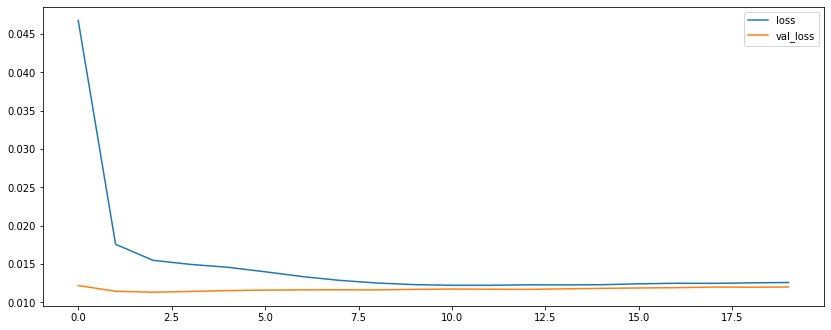

In [ ]:
# plot history
pyplot.plot(losses, label='loss')
pyplot.plot(val_losses, label='val_loss')
pyplot.legend()
pyplot.show()

In [ ]:
#Evaluate on the test test
test_losses, test_preds  = [], []
transformer.eval()
for (x, y) in test_dataset:
    S = x.shape[-2]
    y_pred, _ = transformer(x,
                            mask=create_look_ahead_mask(S))
    loss_test = torch.nn.MSELoss()(y_pred, y)  # (B,S)
    test_losses.append(loss_test.item())
    test_preds.append(y_pred.detach().cpu().numpy())
test_preds = np.vstack(test_preds)
np.mean(test_losses)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([28, 1, 5])) that is different to the input size (torch.Size([28, 12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0.011830310686187473

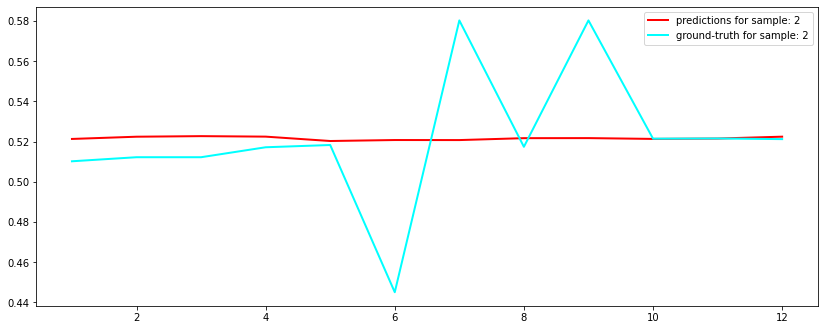

In [ ]:
# Display predictions vs ground truth: 
# we'll take one random element of the first batch
# and display the first feature
seq_len = 12
index = np.random.randint(32)
feature_num = 0

x_test, _ = test_dataset.dataset.tensors
x_test = x_test[index, :, feature_num].cpu().numpy()
pred = test_preds[index, :, feature_num]
x = np.linspace(1, seq_len, seq_len)
plt.plot(x, pred, 'red', lw=2, label='predictions for sample: {}'.format(index))
plt.plot(x, x_test, 'cyan', lw=2, label='ground-truth for sample: {}'.format(index))
plt.legend(fontsize=10)
plt.show()

In [ ]:
# calculate RMSE
rmse = sqrt(mean_squared_error(pred, x_test))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.033


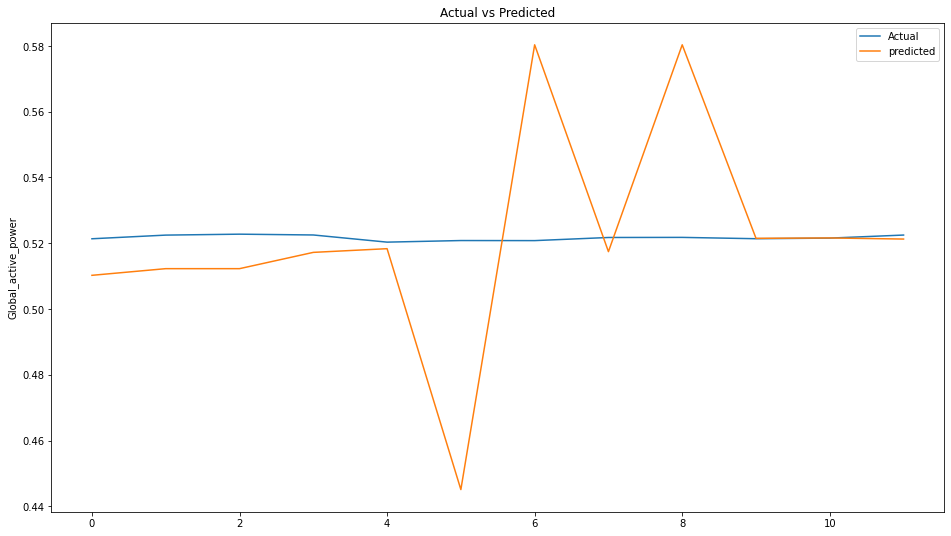

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,9))
plt.plot( list(pred))
#plt.plot( list(validate['Global_active_power']))
plt.plot( list(x_test))
plt.title("Actual vs Predicted")
plt.ylabel("Global_active_power")
plt.legend(('Actual','predicted'))
plt.show()

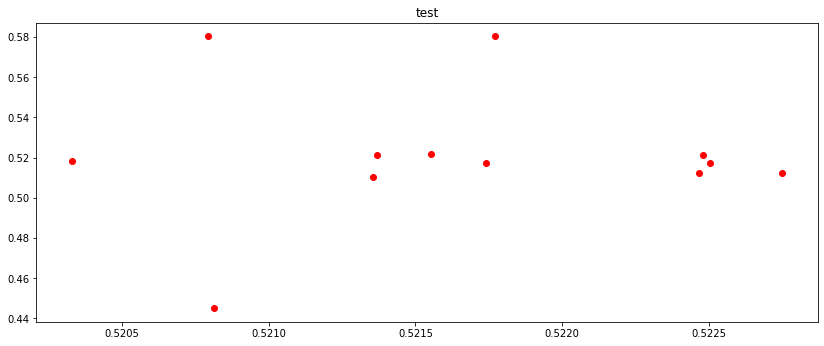

In [ ]:
#Graph
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(y_test, y_pred, color='red')
    plt.plot(range(my_range), range(my_range), 'o')
    plt.title(regressorName)
    plt.show()
    return

plotGraph(list(pred) ,list(x_test),"test")

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
     def mean_absolute_percentage_error(y_true, y_pred): 
         y_true, y_pred = np.array(y_true), np.array(y_pred)
         return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
     print('Evaluation metric results:-')
     print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
     print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
     print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
     print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')

In [ ]:
import sklearn.metrics as metrics
import numpy as np
timeseries_evaluation_metrics_func(x_test,pred)

Evaluation metric results:-
MSE is : 0.0010914735030382872
MAE is : 0.019883131608366966
RMSE is : 0.0330374576151371
MAPE is : 3.8403835147619247
